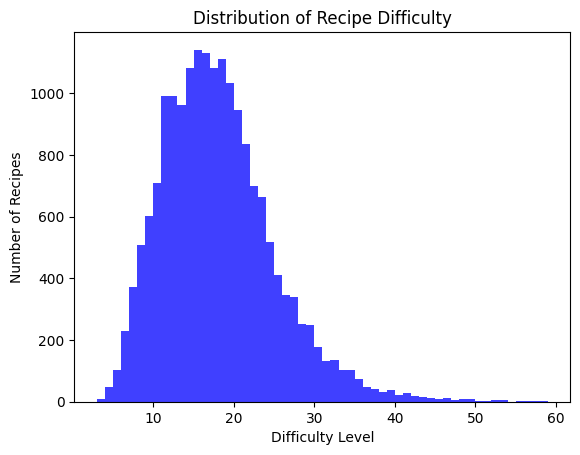

Text(value='', description='Ingredient:', placeholder='Type an ingredient')

IntSlider(value=5, description='Difficulty:', max=59, min=3)

Button(description='Find Recipes', style=ButtonStyle())

Output()

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Load JSON data from a file where each line is a separate JSON object
file_path = 'Recipes.json'
recipes = []
with open(file_path, 'r') as file:
    for line in file:
        recipes.append(json.loads(line.strip()))

# Create a DataFrame
df = pd.DataFrame(recipes)

# Function to calculate difficulty based on number of ingredients and steps
def calculate_difficulty(recipe):
    num_ingredients = len(recipe['ingredients'])
    num_directions = len(recipe['directions'])
    return num_ingredients + num_directions

# Apply the difficulty calculation
df['difficulty'] = df.apply(calculate_difficulty, axis=1)

# Visualize difficulty distribution
plt.hist(df['difficulty'], bins=range(min(df['difficulty']), max(df['difficulty']) + 1), alpha=0.75, color='blue')
plt.title('Distribution of Recipe Difficulty')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Recipes')
plt.show()

# Interactive input/output setup
ingredient_input = widgets.Text(
    value='',
    placeholder='Type an ingredient',
    description='Ingredient:',
    disabled=False
)

difficulty_input = widgets.IntSlider(
    value=5,
    min=df['difficulty'].min(),
    max=df['difficulty'].max(),
    step=1,
    description='Difficulty:',
    disabled=False
)

button = widgets.Button(description="Find Recipes")
output = widgets.Output()

def find_recipes(b):
    output.clear_output()
    with output:
        ingredient = ingredient_input.value.lower()
        difficulty = difficulty_input.value
        filtered = df[df.apply(lambda x: any(ing['ingredient'].lower() == ingredient for ing in x['ingredients']) and x['difficulty'] == difficulty, axis=1)]
        if not filtered.empty:
            print(f"Recipes with '{ingredient}' at difficulty {difficulty}:")
            for index, row in filtered.iterrows():
                print(row['name'])
        else:
            print(f"No recipes found with '{ingredient}' at difficulty {difficulty}.")

button.on_click(find_recipes)

# Display widgets
display(ingredient_input, difficulty_input, button, output)
